In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excel_Data\NonMotors\Feature_CpG_Gene_Association\Cognition_Processed_Files
df = pd.read_csv ("CognitionCateg_Methylome_APPRDXFilter.csv")
df = df.round(decimals = 6)
df.head(2)


Z:\PPMI_Data\Excel_Data\NonMotors\Feature_CpG_Gene_Association\Cognition_Processed_Files


,Sentrix,PATNO,HYS,Gender,APPRDX,Montreal_Cognitive,cg08012045,cg08300930,cg00134295,cg10537824,...,cg10054014,cg15364874,cg06622006,cg22071811,cg24960706,cg06917935,cg02794319,cg10702286,cg10353174,cg19590050
0,200991620021_R01C01,3001,2,1,1,0,0.962437,0.964442,0.24353,0.826172,...,0.852622,0.880126,0.876185,0.770531,0.830047,0.216268,0.234350,0.681550,0.103758,0.837890
1,200973410167_R04C01,3007,2,1,1,0,0.962158,0.963041,0.22606,0.729373,...,0.900772,0.901686,0.906222,0.804494,0.905520,0.254265,0.290337,0.760554,0.075480,0.833824


In [3]:
df1 = df[df.PATNO != 4709]

In [5]:
df_data = df1.drop([ 'Sentrix', 'PATNO','HYS', 'Gender', 'Montreal_Cognitive', 'APPRDX'], axis=1)
df_data.head(2)

,cg08012045,cg08300930,cg00134295,cg10537824,cg04990650,cg03379001,cg02215627,cg06699201,cg18100935,cg19220149,...,cg10054014,cg15364874,cg06622006,cg22071811,cg24960706,cg06917935,cg02794319,cg10702286,cg10353174,cg19590050
0,0.962437,0.964442,0.24353,0.826172,0.845330,0.852316,0.871498,0.653140,0.89167,0.874343,...,0.852622,0.880126,0.876185,0.770531,0.830047,0.216268,0.234350,0.681550,0.103758,0.837890
1,0.962158,0.963041,0.22606,0.729373,0.830303,0.764861,0.821899,0.717675,0.88783,0.817058,...,0.900772,0.901686,0.906222,0.804494,0.905520,0.254265,0.290337,0.760554,0.075480,0.833824


In [6]:
colors = {1:"red", 2: "green"}

In [7]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [8]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='r', markersize=15, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='g', markersize=15, color='floralwhite')]

In [14]:
df_targets = df1[['APPRDX']]

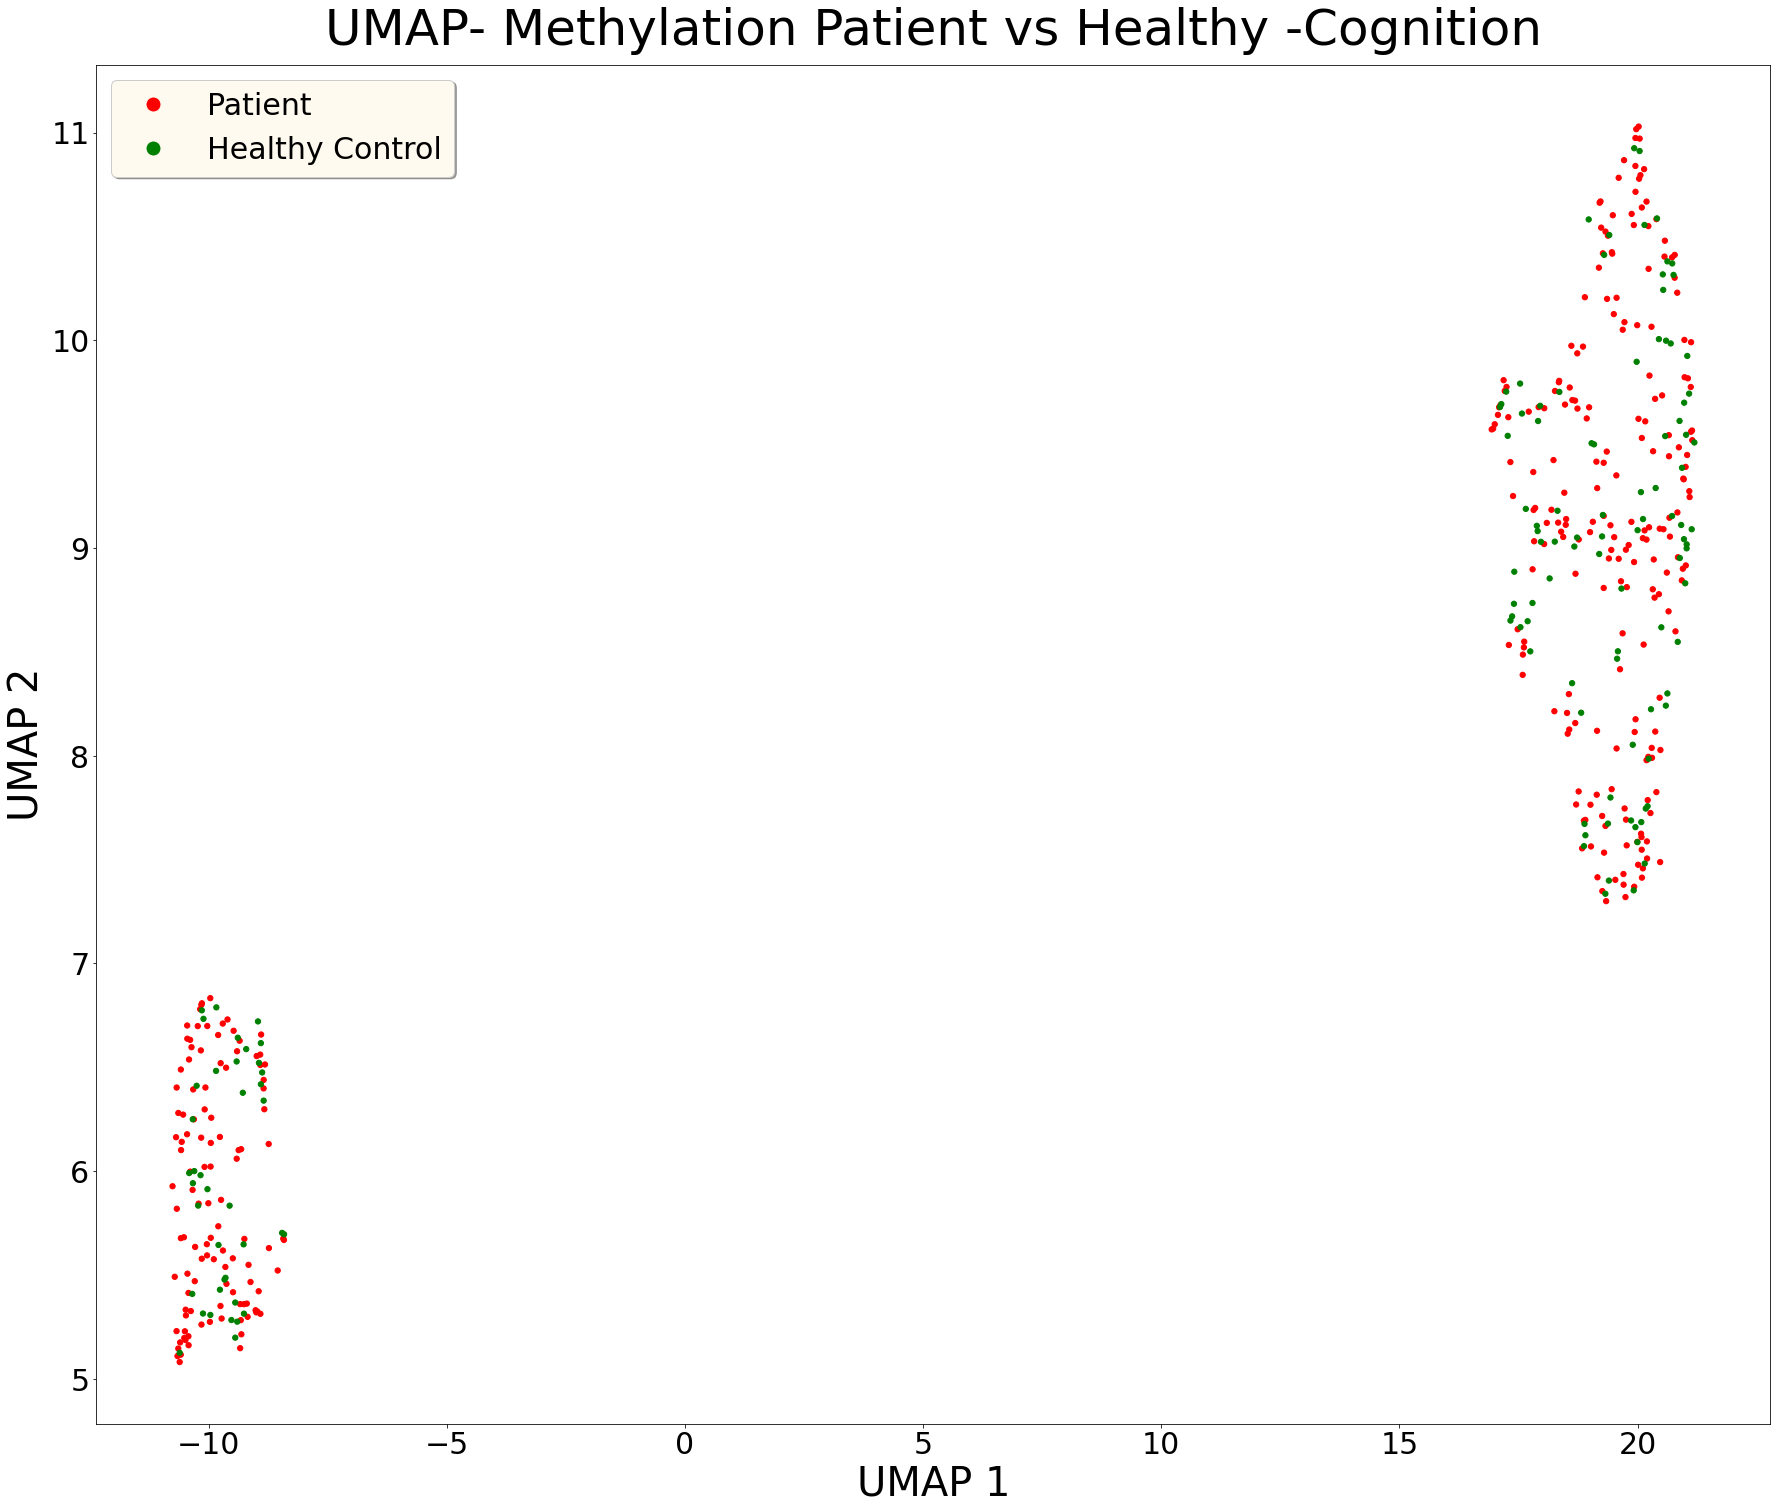

In [15]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP- Methylation Patient vs Healthy -Cognition", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_CpG_PatVsHealthy_Cognition.pdf", format="pdf")
plt.savefig("UMAP_CpG_PatVsHealthy_Cognition.svg", format="svg")
plt.show()

In [ ]:
# Gender Basis
df_targets = df1[['Gender']]


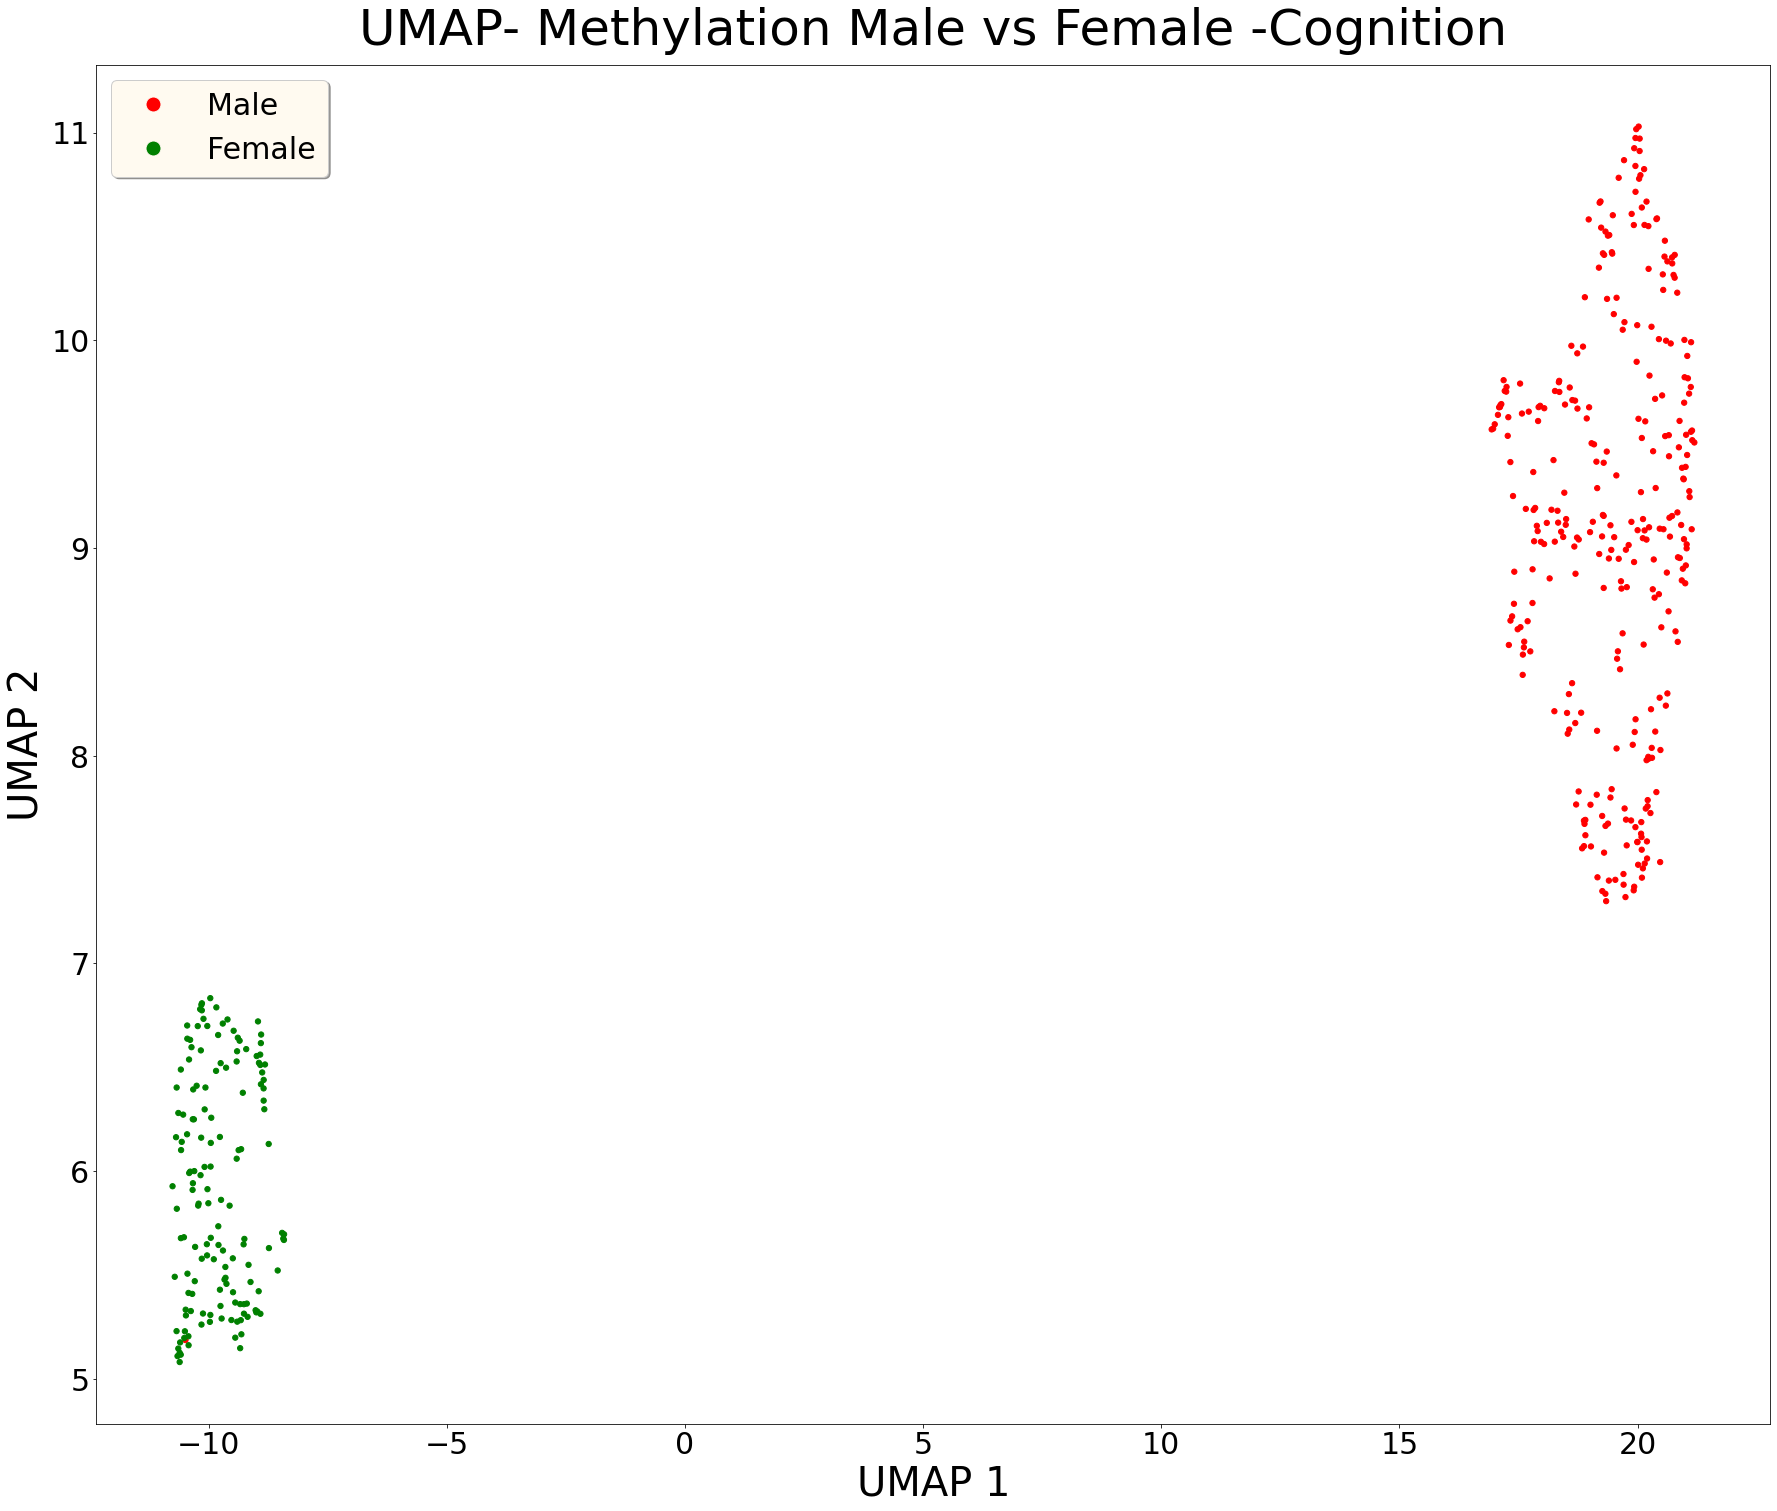

In [12]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['Gender'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP- Methylation Male vs Female -Cognition", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Male', 'Female'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_CpG_MaleVsFemale_Cognition.pdf", format="pdf")
plt.savefig("UMAP_CpG_MaleVsFemale_Cognition.svg", format="svg")
plt.show()